# **미니 프로젝트**

## 장가영


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기
train=pd.read_csv("movies_train.csv")

+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
print(train.shape)

(600, 12)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [11]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [12]:
train['release_time']=pd.to_datetime(train['release_time'])

## 1. 주연배우 수와 관객 수 간의 상관관계 분석

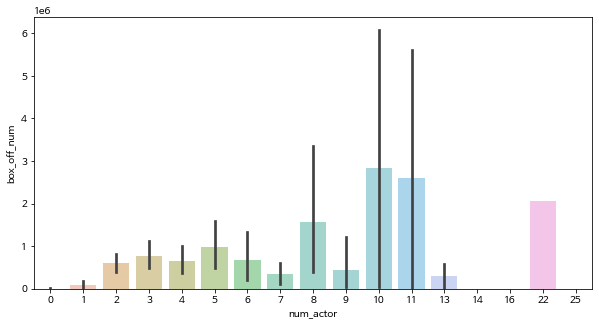

In [16]:
plt.figure(figsize = (10,5))
sns.barplot('num_actor','box_off_num',data=train, alpha=0.5)

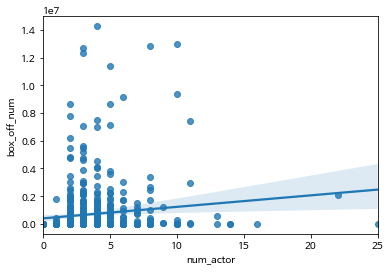

In [33]:
sns.regplot(x= 'num_actor',y= 'box_off_num', data = train)

In [52]:
train[['num_actor','box_off_num']].groupby('num_actor').mean().sort_values('box_off_num', ascending=False).head(10)

,box_off_num
num_actor,
10,2.833073e+06
11,2.609364e+06
22,2.057896e+06
8,1.564733e+06
5,9.793652e+05
3,7.617409e+05
6,6.717456e+05
4,6.505452e+05
2,5.987551e+05


In [13]:
train['num_actor'].corr(train['box_off_num'])

0.11117934450388656

- 주연 배우와 관객 수 사이 상관계수는 0.1 정도로 상관 관계가 큰 편은 아니다.
- 주연 배우가 많을 수록 관객 수가 많은 것도 아니다. 관객 수가 가장 많았던 영화의 주연배우 수는 4명이고 평균적으로 따지면 주연 배우가 10-11명일 때 관객수가 많다.

## 2. 상영 등급에 따른 관객 수 분석

In [53]:
train['screening_rat'].value_counts().sort_values(ascending=False)

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

- 청소년 관람불가, 15세, 12세, 전체 관람가 순으로 자료가 많다.

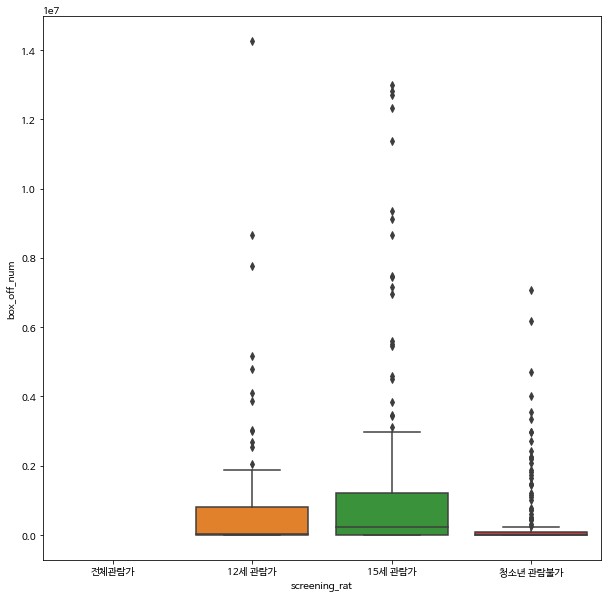

In [20]:
plt.figure(figsize = (10,10))
boxplot = sns.boxplot(x='screening_rat', y='box_off_num', data=train, order = ['전체관람가', '12세 관람가', '15세 관람가', '청소년 관람불가'])

In [21]:
train[['screening_rat','box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num', ascending = False)

,box_off_num
screening_rat,
15세 관람가,1.247519e+06
12세 관람가,8.449809e+05
청소년 관람불가,3.641813e+05
전체 관람가,1.351005e+05


- 전체 관람가 관객 수가 많을 것이라고 생각했는데 의외로 연령 제한이 있는 영화들의 관객 수가 더 많았다.
- 15세, 12세 관람가, 청소년 관람불가, 전체 관람가 순으로 관객 수 평균이 집계된다.

## 3. 감독 전작 갯수와 상영시간 사이 관계 분석

In [22]:
director_prev_num = train.groupby('dir_prev_num')

In [23]:
director_prev_num[['time']].mean().sort_values('time')

,time
dir_prev_num,
0,96.512121
1,102.530973
2,105.267442
3,112.191489
5,112.500000
4,115.350000


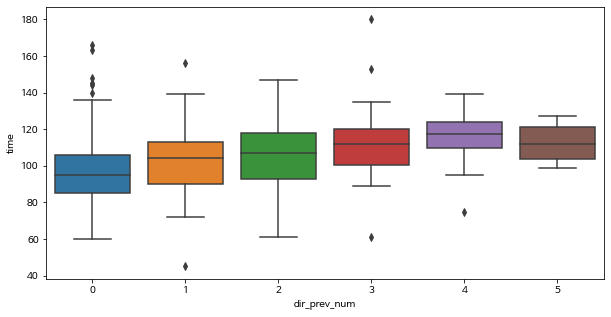

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot( x='dir_prev_num', y= 'time', data = train)

- 감독의 전작이 많을 수록 상영시간이 길어진다고 할 수 있다.
- 감독의 전작이 3개, 5개일 때는 거의 비슷한 상영 시간을 보이지만 경향으로 따지면 상영시간이 증가하는 추세이다.

## 4. 장르와 스텝 수의 관계

In [57]:
train.groupby('genre')[['genre']].count()

,genre
genre,
SF,13
공포,42
느와르,27
다큐멘터리,93
드라마,221
멜로/로맨스,78
뮤지컬,5
미스터리,17
서스펜스,2


In [64]:
mean_staff = train.groupby('genre')['num_staff'].mean().to_frame().sort_values('num_staff',ascending = False)
mean_staff

,num_staff
genre,
액션,337.535714
느와르,311.074074
코미디,209.075472
SF,197.307692
공포,176.380952
드라마,164.484163
멜로/로맨스,135.782051
미스터리,117.352941
서스펜스,111.000000


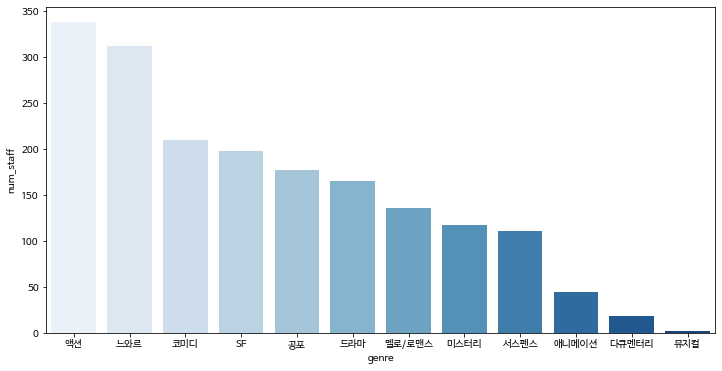

In [65]:
mean_staff = mean_staff.reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(x='genre', y= 'num_staff', data = mean_staff, palette = 'Blues')

- 액션이나 느와르 같은 장르에는 평균적으로 많은 수의 스태프가 필요한 것으로 보인다.
- 뮤지컬은 다른 장르들보다 스태프 수가 그렇게 많이 필요하지는 않다. 그런데 5개 자료 밖에 없어서 더 많은 자료가 있어야 이 사실을 좀 더 확정적으로 말할 수 있다.

## 5. 연도별 상영시간 비교

In [70]:
train['year'] = train['release_time'].dt.year
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010


In [98]:
train.groupby('year')[['year']].count()

,year
year,
2010,90
2011,80
2012,88
2013,95
2014,127
2015,120


In [99]:
year_data = train.groupby('year')

In [100]:
df_year_data = year_data[['time']].mean().sort_values('year')
df_year_data

,time
year,
2010,103.044444
2011,101.600000
2012,101.295455
2013,101.505263
2014,98.645669
2015,100.258333


In [101]:
df_year_data = df_year_data.reset_index()
df_year_data

,year,time
0,2010,103.044444
1,2011,101.600000
2,2012,101.295455
3,2013,101.505263
4,2014,98.645669
5,2015,100.258333


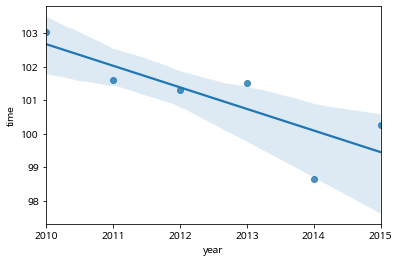

In [102]:
sns.regplot(x= 'year', y = 'time', data = df_year_data)

In [103]:
train['year'].corr(train['time'])

-0.0625746184520387

- 개봉 연도와 상영시간 사이 상관계수가 0에 거의 가깝게 나온 것으로 보아 두 변수 사이에는 큰 상관관계가 없어보인다.
- 전체적으로 평균 상영시간이 100분 정도로 시간이 가도 상영시간은 거의 일정하게 잘 지켜지고 있다.